In [ ]:
!pip install librosa

In [ ]:
import librosa
from IPython.display import Audio
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment
import numpy as np
import time

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

def capture_sounds(nbr_records=5,sounds=["cero","uno","dos","tres","cuatro","cinco","seis","siete","ocho","nueve"]):
  file_list=list()
  for sound in sounds:
    text="Por favor diga una vez la palabra '{}' después de cada indicación".format(sound)
    print(text)
    time.sleep(1)
    for nbr in range(nbr_records):
      print("Diga {}".format(sound))
      audio=record(1)
      audio.export("{}_{}.mp3".format(sound,nbr),format="mp3")
      file_list.append("{}_{}.mp3".format(sound,nbr))
  return file_list



In [ ]:
file_list=capture_sounds()

In [ ]:
! ls

cero_0.mp3   cinco_4.mp3   dos_3.mp3	ocho_2.mp3   siete_0.mp3  tres_4.mp3
cero_1.mp3   cuatro_0.mp3  dos_4.mp3	ocho_3.mp3   siete_1.mp3  uno_0.mp3
cero_2.mp3   cuatro_1.mp3  nueve_0.mp3	ocho_4.mp3   siete_2.mp3  uno_1.mp3
cero_3.mp3   cuatro_2.mp3  nueve_1.mp3	sample_data  siete_3.mp3  uno_2.mp3
cero_4.mp3   cuatro_3.mp3  nueve_2.mp3	seis_0.mp3   siete_4.mp3  uno_3.mp3
cinco_0.mp3  cuatro_4.mp3  nueve_3.mp3	seis_1.mp3   tres_0.mp3   uno_4.mp3
cinco_1.mp3  dos_0.mp3	   nueve_4.mp3	seis_2.mp3   tres_1.mp3
cinco_2.mp3  dos_1.mp3	   ocho_0.mp3	seis_3.mp3   tres_2.mp3
cinco_3.mp3  dos_2.mp3	   ocho_1.mp3	seis_4.mp3   tres_3.mp3


In [ ]:
print(file_list)

['cero_0.mp3', 'cero_1.mp3', 'cero_2.mp3', 'cero_3.mp3', 'cero_4.mp3', 'uno_0.mp3', 'uno_1.mp3', 'uno_2.mp3', 'uno_3.mp3', 'uno_4.mp3', 'dos_0.mp3', 'dos_1.mp3', 'dos_2.mp3', 'dos_3.mp3', 'dos_4.mp3', 'tres_0.mp3', 'tres_1.mp3', 'tres_2.mp3', 'tres_3.mp3', 'tres_4.mp3', 'cuatro_0.mp3', 'cuatro_1.mp3', 'cuatro_2.mp3', 'cuatro_3.mp3', 'cuatro_4.mp3', 'cinco_0.mp3', 'cinco_1.mp3', 'cinco_2.mp3', 'cinco_3.mp3', 'cinco_4.mp3', 'seis_0.mp3', 'seis_1.mp3', 'seis_2.mp3', 'seis_3.mp3', 'seis_4.mp3', 'siete_0.mp3', 'siete_1.mp3', 'siete_2.mp3', 'siete_3.mp3', 'siete_4.mp3', 'ocho_0.mp3', 'ocho_1.mp3', 'ocho_2.mp3', 'ocho_3.mp3', 'ocho_4.mp3', 'nueve_0.mp3', 'nueve_1.mp3', 'nueve_2.mp3', 'nueve_3.mp3', 'nueve_4.mp3']


In [ ]:
# prueba
audio_cero_cero, sr = librosa.load("cero_0.mp3")
print(sr)
print(len(audio_cero_cero))

22050
21168


In [ ]:
Audio(data=audio_cero_cero, rate=sr)

In [ ]:
audio_nueve_uno, sr = librosa.load("nueve_1.mp3")
print(len(audio_nueve_uno))

21168


In [ ]:
!ls -lH

total 432
-rw-r--r-- 1 root root  7725 Aug 18 01:44 cero_0.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:44 cero_1.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:44 cero_2.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:44 cero_3.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:44 cero_4.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:15 cinco_0.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:15 cinco_1.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:15 cinco_2.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:15 cinco_3.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:15 cinco_4.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:14 cuatro_0.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:14 cuatro_1.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:14 cuatro_2.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:14 cuatro_3.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:15 cuatro_4.mp3
-rw-r--r-- 1 root root 15405 Aug 18 01:44 dos_0.mp3
-rw-r--r-- 1 root root  8109 Aug 18 01:44 dos_1.mp3
-rw-r--r-- 1 root root 15789 Aug 18 01:44 dos_2.mp3
-rw-r--r-- 1 root root  

In [ ]:
!cp cero_1.mp3 cero_0.mp3 # hack para que queden todos los mp3 del mismo largo (vectores) y poder avanzar

In [ ]:
! ls -lh

total 432K
-rw-r--r-- 1 root root 8.0K Aug 18 01:45 cero_0.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:44 cero_1.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:44 cero_2.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:44 cero_3.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:44 cero_4.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:15 cinco_0.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:15 cinco_1.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:15 cinco_2.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:15 cinco_3.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:15 cinco_4.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:14 cuatro_0.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:14 cuatro_1.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:14 cuatro_2.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:14 cuatro_3.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:15 cuatro_4.mp3
-rw-r--r-- 1 root root  16K Aug 18 01:44 dos_0.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:44 dos_1.mp3
-rw-r--r-- 1 root root  16K Aug 18 01:44 dos_2.mp3
-rw-r--r-- 1 root root 8.0K Aug 18 01:44 

In [ ]:
#Cargamos todos los audios generados anteriormente en una lista
audios=list()
for file in file_list:
  audios.append(librosa.load(file)[0])
audios=np.array(audios)

In [ ]:
#Calculamos los mfcc para cada uno de los audios
mfccs=list()
for audio in audios:
  mfccs.append( librosa.feature.mfcc(y=audio,sr=22050,n_mfcc=20) )


In [ ]:
#Generamos los labels para el clasificador
labels=list()
for i in range(10):
  for j in range(5):
    labels.append(i)
labels=np.array(labels)

In [ ]:
#A partir de los mfcc generamos los features de entrada, que van a ser los promedios de cada uno de los mfcc
features=list()
for mfcc in mfccs:
  features.append(mfcc.mean(axis=1))
features=np.array(features)

In [ ]:
print(features[0].shape)
print(len(features))
print(mfccs[0].shape)

(20,)
50
(20, 42)


**Importante: **

Con un array cuyo shape es (20,42), donde cada fila corresponde a una banda de frecuencias y cada columna a una franja temporal.

porque son 20 features por audio, 20 mfcc

mfcc_1 = t1, t2, t3,

mfcc_2 = t1, t2, t3 etc

# Comparemos las características de clustering del audio sin procesar y de los MFCC

In [ ]:
from sklearn.manifold import TSNE

tsn = TSNE(n_components=2,perplexity=20,n_iter=10000)


In [ ]:
X = tsn.fit_transform(audios)

Text(0.5, 1.0, 'T-SNE de los vectores de audio')

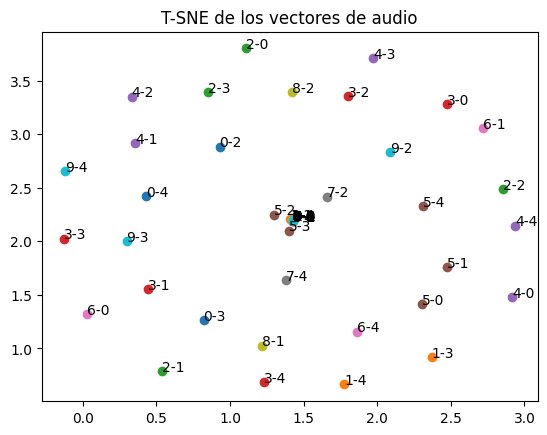

In [ ]:
for idx in range(10):
  plt.scatter(X[idx*5:(idx+1)*5,0],X[idx*5:(idx+1)*5,1])
  for pnt in range(5):
    plt.text(X[idx*5+pnt,0],X[idx*5+pnt,1],s=str(idx)+"-"+str(pnt))
plt.title("T-SNE de los vectores de audio")

Text(0.5, 1.0, 'T-SNE de los vectores de features')

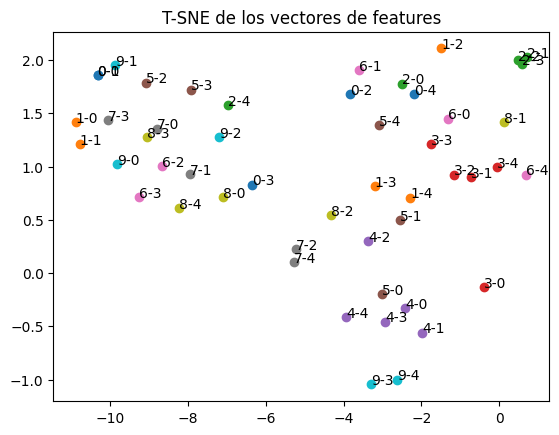

In [ ]:
#x = features
#X=tsn.fit_transform(x.todense())
X=tsn.fit_transform(features)

for idx in range(10):
  plt.scatter(X[idx*5:(idx+1)*5,0],X[idx*5:(idx+1)*5,1])
  for pnt in range(5):
    plt.text(X[idx*5+pnt,0],X[idx*5+pnt,1],s=str(idx)+"-"+str(pnt))
plt.title("T-SNE de los vectores de features")

In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(audios, labels):
  X_train, X_test = audios[train_index], audios[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=LogisticRegression(C=1,solver="lbfgs",multi_class="multinomial",max_iter=10000)
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.1
0.1
0.1
0.1
0.2


In [ ]:
# SVC
from sklearn.svm import SVC
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(audios, labels):
  X_train, X_test = audios[train_index], audios[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=SVC(kernel="rbf",max_iter=10000,gamma="auto")
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

0.1
0.0
0.1
0.1
0.0


In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=LogisticRegression(C=1,solver="lbfgs",multi_class="multinomial",max_iter=10000)
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4
0.5
0.6
0.6
0.4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


con features, 0.9 de score/accuracy

# SVC

In [ ]:
skf = StratifiedKFold(n_splits=5)
#clf = clasificador
for train_index, test_index in skf.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  clf=SVC(kernel="linear",max_iter=10000,gamma="auto")
  clf.fit(X_train,y_train)
  print(clf.score(X_test,y_test))

1.0
0.7
0.8
1.0
1.0


Primer pregunta, sobre cual es mejor, este último, accuracy= 1
?

In [ ]:
Stratified K-Folding (K=5) tiene que ver en como se dividien los datos y la técnica que me conviene para esta cantidad

SyntaxError: ignored

In [ ]:
Pregunta 1
Cuántas muestras corresponden a una grabación de un número en particular?



21168

Pregunta 2
Debido a la cantidad de samples que se tienen, cuál es el método de validación mas propicio?


Cross-Validation


Leave One Out


**Stratified K-Folding (K=5)** <<-- este

Stratified K-Folding (K=3)

In [ ]:
Pregunta 3
Cómo queda representado cada audio a partir de sus MFCCs?


Con un array cuyo shape es (22168,), donde cada elemento es una muestra temporal.


Con un array cuyo shape es (20,42), donde cada columna corresponde a una banda de frecuencias y cada fila a una franja temporal.


Con un array cuyo shape es (20,42), donde cada fila corresponde a una banda de frecuencias y cada columna a una franja temporal.  <-- este

In [ ]:
Pregunta 4
Indique cuáles de los siguientes features podrían utilizarse para clasificar los audios:

Si tiene alguna duda, deje este punto para el final y compare la performance de los distintos clasificadores usando estos features.


Media de las filas de la matriz de MFCC


Media de las columnas de la matriz de MFCC


Desvío estandar de las filas de la matriz de MFCC


Desvío estandar de las columnas de la matriz de MFCC


Mediana de las filas de la matriz de MFCC


Mediana de las columnas de la matriz de MFCC


Vector de audio original

SyntaxError: ignored